[Linguistic Analysis of a Text Corpus Using spaCy]
There is uploaded text corpus named ’sample.txt’. Conduct a linguistic analysis using Part-of-Speech
(POS) tagging and Named Entity Recognition (NER) in spaCy library. To complete this question you
have to do the following tasks:
1. Prepare the Corpus: Pre-process the corpus data by removing stopwords, removing extra
spaces, converting all text to lowercase, or apply any other text normalization techniques that
you think is relevant.
2. POS Tagging and NER: Apply POS tagging to the entire corpus to analyze the distribution of
different parts of speech. Use NER to identify and categorize named entities within the text
such as name, date, locations etc.
3. Analysis: Determine the most common POS tags and discuss what this reveals about the structure of the text.
4. Prepare a short report: Summarize your findings in a brief report of 1-2 page, including any
interesting patterns or insights gained from the POS and NER analysis.

In [142]:
import spacy 
from prettytable import PrettyTable
import pandas as pd 
from matplotlib import pyplot as plt
from spacy import displacy

f = open("Coding CBS/NLP/sample.txt", "r")
text = f.read()

In [22]:
# 1) loading the text 
load_model = spacy.load('en_core_web_sm', disable = ['parser','ner'])
doc = load_model(text)


In [75]:
table = PrettyTable(['Word', 'Word Lemma(spaCy)'])
words = []

for t in doc: #iterate over tokens
    lemma_string = t.lemma_.replace(" ", "")
    if not t.is_stop and lemma_string not in ["!", "?","[", "]", ".", ",", '"', "...", "-"] and not lemma_string[0] == "\n":
        words.append(t.text.lower())
        table.add_row([str(t),lemma_string.lower()])
print(table)

+------------------+-------------------+
|       Word       | Word Lemma(spaCy) |
+------------------+-------------------+
|    Adventures    |     adventures    |
|      Buster      |       buster      |
|       Bear       |        bear       |
|     Thornton     |      thornton     |
|        W.        |         w.        |
|     Burgess      |      burgess      |
|       1920       |        1920       |
|      BUSTER      |       buster      |
|       BEAR       |        bear       |
|       GOES       |         go        |
|     FISHING      |      fishing      |
|      Buster      |       buster      |
|       Bear       |        bear       |
|      yawned      |        yawn       |
|       lay        |        lie        |
|   comfortable    |    comfortable    |
|       bed        |        bed        |
|      leaves      |       leave       |
|     watched      |       watch       |
|      early       |       early       |
|     morning      |      morning      |
|     sunbeams  

In [80]:
new_doc = load_model(" ".join(words))


In [168]:


rows = []
for w in new_doc:
    rows.append([w, w.pos_])

word_df = pd.DataFrame(rows, columns=["Word", "POS"])


Index(['POS', 'Word'], dtype='object')

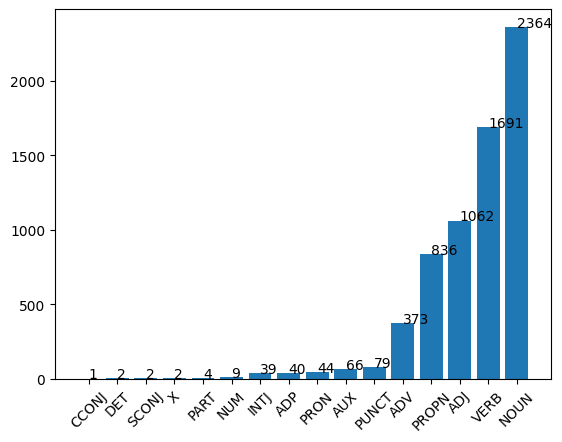

In [177]:
df = word_df.groupby("POS", as_index=False).count().sort_values(by="Word")

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y.iloc[i],y.iloc[i])

def create_barchart(x, y):
    plt.bar(x, y )
    plt.xticks(rotation=45)
    addlabels(x, y)


create_barchart(df.POS, df.Word )
df.columns




In [182]:
lm = spacy.load("en_core_web_sm")
new_doc_ner = lm(new_doc)
ner =[]
for w in new_doc_ner.ents:
    ner.append([w.text, w.label_])

ner_df = pd.DataFrame(ner, columns=["Word", "NER"])



ner_count = ner_df.groupby("NER", as_index=False).count().sort_values(by="Word")
ner_count

,NER,Word
2,GPE,3
0,CARDINAL,6
3,ORDINAL,6
4,ORG,15
1,DATE,19
6,TIME,20
5,PERSON,208


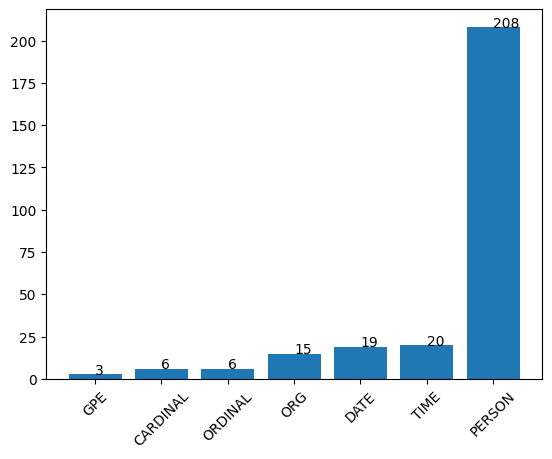

In [180]:
create_barchart(ner_count.NER, ner_count.Word)